In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('C:/Sonu/Dissertation_Final_Project/Deliverables/Dissertation_Report/Submission_Folder/Stress_Fault_Data_CSV/SA_Memory_Cluster_Vs_Node.csv')
df.head(10)




Cluster_Mem  Node_Mem_Backend
0     55775232          15069184
1     55775232          15024128
2     60678144          14958592
3     59686912          14921728
4     66289664          14913536
5     58679296          14917632
6     58679296          14917632
7     58679296          14917632
8     58679296          14917632
9     58679296          14917632

In [3]:
# Standardization of Variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df), columns=['Cluster_Mem','Node_Mem_Backend'])

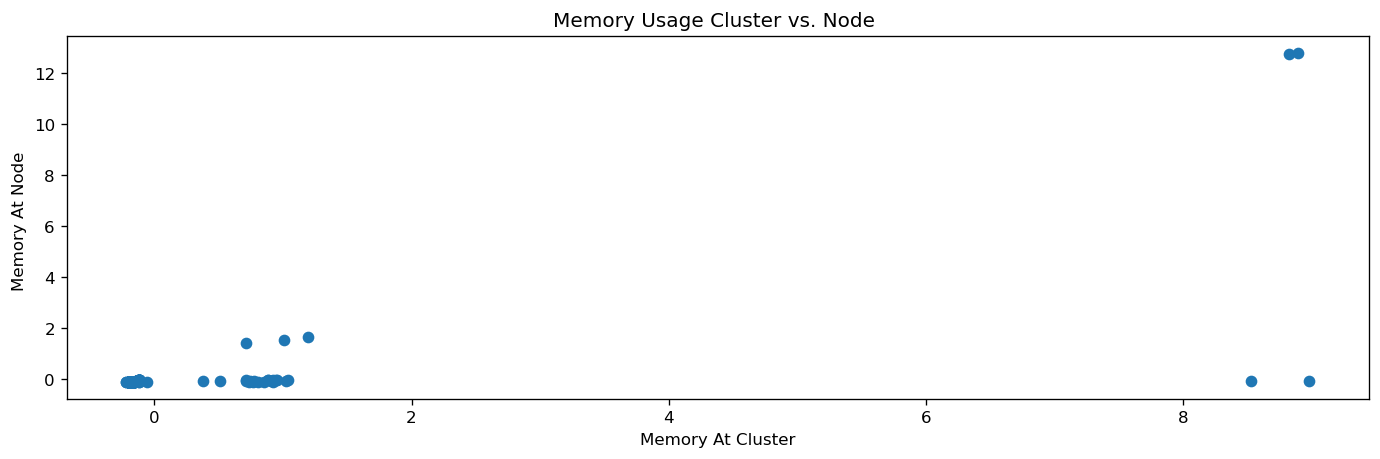

In [5]:
plt.figure(figsize=(14,4))
plt.scatter(df.Cluster_Mem, df.Node_Mem_Backend)
plt.xlabel('Memory At Cluster')
plt.ylabel('Memory At Node ')
plt.title('Memory Usage Cluster vs. Node ')
plt.show()

In [6]:
# K=3 , cause of natural sub clustering and only two features in considaration.Variable fitting to the model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(df)

In [7]:
colors=["red","blue","green","orange"]
# figure setting
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].Cluster_Mem, df[model.labels_==i].Node_Mem_Backend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Memory Data",size=20)
plt.xlabel("At Cluster Level ")
plt.ylabel("At Node Level")
plt.title('Scatter plot of Cluster vs. Node')
plt.legend()
plt.show()

In [8]:
def distance_from_center(Cluster_Mem, Node_Mem_Backend, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
    :param float Cluster Memory Usage: the standardized Memory Usage of the data point 
    :param float Cluster Memory Usage: the standardized Memory at Node of the data point 
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    Cluster_Mem =  model.cluster_centers_[label,0]
    Node_Mem_Backend =  model.cluster_centers_[label,1]
    distance = np.sqrt((Cluster_Mem - Cluster_Mem) ** 2 + (Node_Mem_Backend - Node_Mem_Backend) ** 2)
    return np.round(distance, 2)
df['label'] = model.labels_
df['distance'] = distance_from_center(df.Cluster_Mem, df.Node_Mem_Backend, df.label)

In [9]:
# Sorting datafram to find the top outliers
outliers_idx = list(df.sort_values('distance', ascending=False).head(10).index)
outliers = df[df.index.isin(outliers_idx)]
print(outliers)

     Cluster_Mem  Node_Mem_Backend  label  distance
0      -0.222034         -0.104431      0       0.0
222    -0.196846         -0.100205      0       0.0
223    -0.196846         -0.100205      0       0.0
224    -0.196846         -0.100205      0       0.0
225    -0.196846         -0.100205      0       0.0
226    -0.196846         -0.100205      0       0.0
227    -0.196846         -0.100205      0       0.0
228    -0.196846         -0.100205      0       0.0
229    -0.196846         -0.100205      0       0.0
230    -0.196846         -0.100205      0       0.0


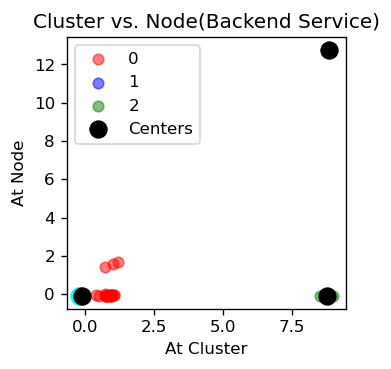

In [12]:
# figure setting
plt.figure(figsize=(3,3))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].Cluster_Mem, df[model.labels_==i].Node_Mem_Backend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.Cluster_Mem, outliers.Node_Mem_Backend, c='aqua', s=100)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Memory Data",size=20)
plt.xlabel("At Cluster")
plt.ylabel("At Node")
plt.title('Cluster vs. Node(Backend Service)')
plt.legend()
plt.show()